### 12.1 a. Suppose the federal government is considering a new tax on cigarettes that is estimated to increase the retail price by 0.25 per pack. If the current price per pack is $6.75, use the IV regression in column (1) to predict the change in demand. Construct a 95% confidence interval for the change in demand

In [1]:
import numpy as np

ans = np.log(7/6.75)
print("Change in demand for cig: ", -0.94*ans)
print ("Confidence interval: ", (-1.36*ans, -0.52*ans))

Change in demand for cig:  -0.0341855855206223
Confidence interval:  (-0.04945999607238972, -0.01891117496885489)


### Suppose that the F-statistic in column (1) were 63.7 instead of 33.7. Would the regression provide a reliable answer to the question posed in (a)? Why or why not?

That would imply that the instrument relevance condition is satisfied even strongly.

### Question 2

a. Does this suggest that together, IVs satisfy exogeniety?
b. Does this suggest that Z_2 IV satisfies exogeniety?


Z_1 has instrument exogeniety but maybe not relevance
Z_2 has instrument relevance but maybe not exogeniety

Value of J=7.5 when m=2 -> df=1, we reject the null of all IVs being exogeneous at 5% critical level

Ans: a. Together, we can comment that atleast one IV is endogenous. Thus E(u|Z_1, Z_2) != 0
     b. We cannot comment upon which IV is the endogenous IV. However, if we go upon the assumption of the classmate then it may be probable.

### Question 3.

How does fertility affect labor supply? That is, how much does a woman’s labor supply fall when she has an additional child? In this exercise, you will estimate this effect using data for married women from the 1980 U.S. Census. The data are available on the text website, http://www.pearsonglobaleditions.com, in the file Fertility and described in the file Fertility_Description. The data set contains information on married women aged 21–35 with two or more children.


e. Is samesex a weak instrument?

In [47]:
import pandas as pd
import statsmodels.api as sm

In [48]:
df = pd.read_stata("fertility.dta")
df.head()

,morekids,boy1st,boy2nd,samesex,agem1,black,hispan,othrace,weeksm1
0,0,1,0,0,27,0,0,0,0
1,0,0,1,0,30,0,0,0,30
2,0,1,0,0,27,0,0,0,0
3,0,1,0,0,35,1,0,0,0
4,0,0,0,1,30,0,0,0,22


In [49]:
y4 = df["weeksm1"]
X4 = sm.add_constant(df[["morekids", "agem1", "black", "hispan", "othrace"]])
instrument = sm.add_constant(df[["samesex", "agem1", "black", "hispan", "othrace"]])

from statsmodels.sandbox.regression.gmm import IV2SLS

mod4 = IV2SLS(y4, X4, instrument = instrument)
res4 = mod4.fit()
print(res4.summary())

                          IV2SLS Regression Results                           
Dep. Variable:                weeksm1   R-squared:                       0.044
Model:                         IV2SLS   Adj. R-squared:                  0.044
Method:                     Two Stage   F-statistic:                     1335.
                        Least Squares   Prob (F-statistic):               0.00
Date:                Mon, 30 Jan 2023                                         
Time:                        10:02:18                                         
No. Observations:              254654                                         
Df Residuals:                  254648                                         
Df Model:                           5                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7919      0.407    -11.786      0.0

In [50]:
x5 = df['morekids']
instrument = sm.add_constant(df[["samesex", "agem1", "black", "hispan", "othrace"]])
mod = sm.OLS(x5, instrument)
res = mod.fit(cov_type = "HC0", use_t = True)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               morekids   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1304.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:02:19   Log-Likelihood:            -1.7423e+05
No. Observations:              254654   AIC:                         3.485e+05
Df Residuals:                  254648   BIC:                         3.485e+05
Df Model:                           5                                         
Covariance Type:                  HC0                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1395      0.008    -16.494      0.0

In [6]:
res.f_test("samesex=0")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1280.9682714127148, p=7.717490312703589e-280, df_denom=2.55e+05, df_num=1>

Thus, we see that 'samesex' is not a weak instrument as the F-test rejects the null that samesex is 0/statistically insignificant

### Question 4

. i. Regress the logarithm of the number of assaults [ln_assaults = ln(assaults)] on the year and month indicators. Is there evidence of seasonality in assaults? That is, do there tend to be more assaults in some months than others? Explain.
ii. Regress total movie attendance (attend = attend_v + attend_m + attend_n) on the year and month indicators. Is there evidence of seasonality in movie attendance? Explain.

In [7]:
df_movies = pd.read_stata("Movies.dta")
df_movies.head()

,wkd_ind,assaults,attend_v,attend_m,attend_n,pr_attend_v,pr_attend_m,pr_attend_n,attend_v_f,attend_m_f,...,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12
0,2,1037,4.4302,4.5009,13.0200,4.9223,3.7808,11.9310,3.0914,4.1061,...,0,0,0,0,0,0,0,0,0,0
1,3,827,3.0914,4.1061,7.6340,3.3526,3.8951,7.7697,2.3211,3.8242,...,0,0,0,0,0,0,0,0,0,0
2,4,864,2.3211,3.8242,5.1748,2.4991,3.1744,4.8070,2.0207,3.4072,...,0,0,0,0,0,0,0,0,0,0
3,5,801,2.0207,3.4072,6.0123,2.6573,3.3738,5.9798,1.6774,3.7537,...,0,0,0,0,0,0,0,0,0,0
4,6,802,1.6774,3.7537,5.8236,2.3952,2.8532,5.2682,1.6346,4.3510,...,0,0,0,0,0,0,0,0,0,0


In [20]:
y = np.log(df_movies[['assaults']])
x = sm.add_constant(df_movies[[x for x in df_movies.columns if "year" in x and "year10" not in x or "month" in x and "month12" not in x]])
mod = sm.OLS(y, x)
res = mod.fit(cov_type = "HC0", use_t = True)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               assaults   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     3212.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        02:55:31   Log-Likelihood:                 741.74
No. Observations:                 516   AIC:                            -1441.
Df Residuals:                     495   BIC:                            -1352.
Df Model:                          20                                         
Covariance Type:                  HC0                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7924      0.018    499.781      0.0

There does seem to be a bit of seasonality in ln(assaults), as the year progresses, the number of assaults commited seems to increase and the drops in Jan along with a clear trend

<AxesSubplot: >

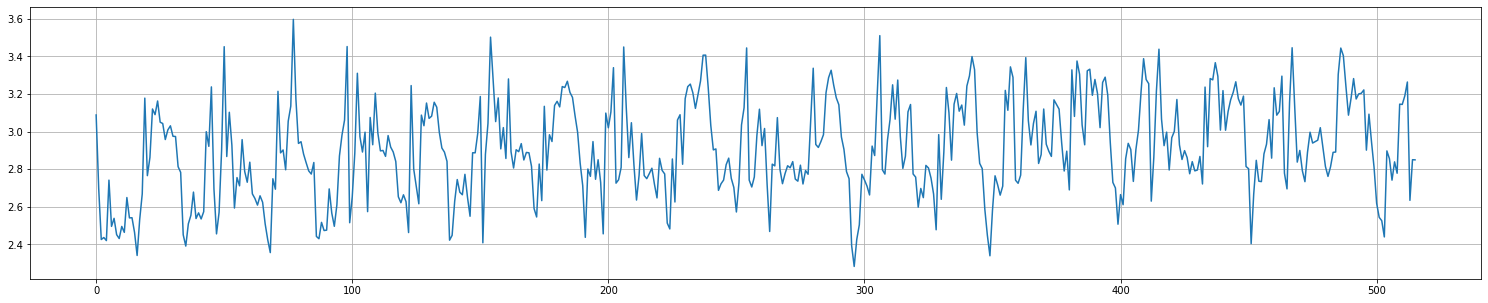

In [26]:
y.plot(figsize = (26, 5), grid = True)

In [22]:
y = np.log(df_movies[['attend_m', "attend_n", "attend_v"]].sum(axis = 1))
x = sm.add_constant(df_movies[[x for x in df_movies.columns if "year" in x and "year10" not in x or "month" in x and "month12" not in x]])
mod = sm.OLS(y, x)
res = mod.fit(cov_type = "HC0", use_t = True)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     49.24
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          5.75e-104
Time:                        03:00:24   Log-Likelihood:                 157.30
No. Observations:                 516   AIC:                            -272.6
Df Residuals:                     495   BIC:                            -183.4
Df Model:                          20                                         
Covariance Type:                  HC0                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9822      0.049     61.469      0.0

On average, there exists a seasonal pattern where the attendence increases in the summer months of june/july and drops in the winter months of october

<AxesSubplot: >

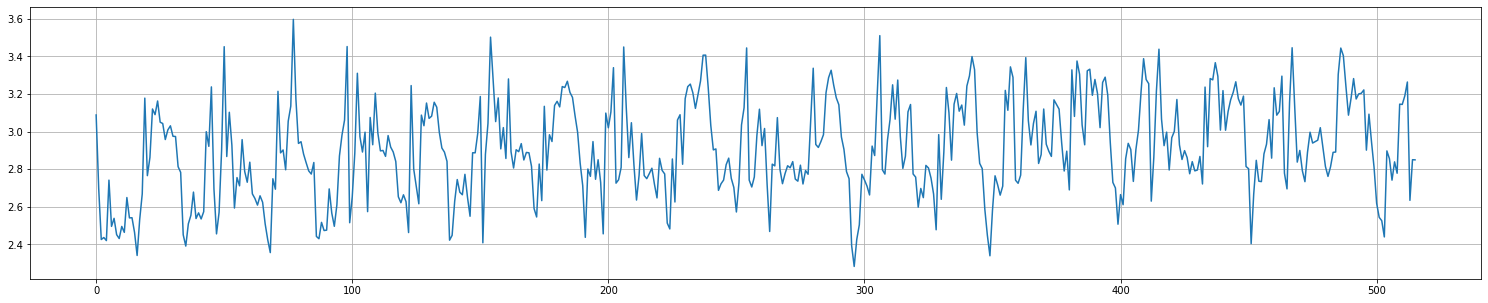

In [27]:
y.plot(figsize = (26, 5), grid = True)

In [31]:
y = np.log(df_movies[['assaults']])
x = sm.add_constant(df_movies[[x for x in df_movies.columns if "year" in x and "year10" not in x or "month" in x and "month12" not in x] + ['attend_m', "attend_n", "attend_v"] + [x for x in df_movies.columns if x.startswith("w_") or x.startswith("h_")]])
mod = sm.OLS(y, x)
res = mod.fit(cov_type = "HC0", use_t = True)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               assaults   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3418.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        03:10:14   Log-Likelihood:                 924.66
No. Observations:                 516   AIC:                            -1773.
Df Residuals:                     478   BIC:                            -1612.
Df Model:                          37                                         
Covariance Type:                  HC0                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9560      0.019    482.989      0.0

Watching a strongly violent movie (increase in attendence, attend_v by 1 Million people) leads to a decrease in ln(assaults) by 0.3% and the effect is statistically significant

In [32]:
res.f_test("attend_v = attend_m")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.0015451950819228332, p=0.9686604676565318, df_denom=478, df_num=1>

In [33]:
res.f_test("attend_v = attend_n")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1.7615159916022731, p=0.18506911414315388, df_denom=478, df_num=1>

No statistically significant difference between watching the three different types of movies and increase in assaults

In [44]:
del_y = 6*res.params.attend_v - 2*res.params.attend_m - res.params.attend_n
del_y

-0.010632058995258745

There will be a 1% decrease in assaults

In [42]:
res.f_test("6*attend_v - 2*attend_m - attend_n = 0")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=4.8754528068890615, p=0.027715310633701865, df_denom=478, df_num=1>

In [43]:
se_y = abs(6*res.params.attend_v - 2*res.params.attend_m - res.params.attend_n) / np.sqrt(res.f_test("6*attend_v - 2*attend_m - attend_n = 0").fvalue)
se_y

0.004815150871645939

In [46]:
print("Confidence Interval: ", (-1.96*se_y + del_y, del_y + 1.96*se_y))

Confidence Interval:  (-0.020069754703684786, -0.0011943632868327038)


~ (-2%, -0.1%)